In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import json
import os

# Read data

Прочитаем данные, собранные с виртуальной машины и конвертированные из .json в .csv формат для анализа.

In [3]:
input_dir = 'data/data_run08_r03/csv/'
loads_json = 'data/data_run08_r03/2018-10-27T141736-loads.jsonl'
fails_json = 'data/data_run08_r03/2018-10-27T141736-fails.jsonl'

In [4]:
files_list = os.listdir(input_dir)
data = {}

for afile in files_list:
    
    afile_path = os.path.join(input_dir, afile)

    if not os.path.isfile(afile_path):
        continue
        
    data[afile[:-4]] = pd.read_csv(afile_path).fillna("None").sort_values(by=['timestamp'])
    

# конвертируем время в секунды и отнимем начало сбора данных для удобства дальнейшей работы
start_time = -999
for key in data.keys():
    start_time_key = data[key]['timestamp'].min()
    if start_time == -999:
        start_time = start_time_key
    if start_time_key < start_time:
        start_time = start_time_key

for key in data.keys():
    data[key]['timestamp'] -= start_time
    data[key]['timestamp'] /= 10.**9

В результате имеем данные в следующем формате:

    data = {'Companent Name': pandas.DataFrame(), ...},

где **pandas.DataFrame()** - таблица со значениями параметров компонента. Например, имена всех доступных компонент СХД:

In [5]:
list(data.keys())

['c5f2100035',
 'c5f210005a',
 'c5f2100069',
 'c5f2100089',
 'fc',
 'scsi-35000cca25308c2bc',
 'scsi-35000cca2530e8b94',
 'scsi-35000cca2530e931c',
 'scsi-35000cca2530eb470',
 'scsi-35000cca25314a904',
 'scsi-35000cca2531af214',
 'scsi-35000cca2531e0fd8',
 'scsi-35000cca2531f3ccc',
 'scsi-35000cca2531f3e10',
 'scsi-35000cca2531f3f74',
 'scsi-35000cca2531f481c',
 'scsi-35000cca253200f10',
 'scsi-35000cca253202250',
 'scsi-35000cca253202258',
 'scsi-35000cca253204290',
 'scsi-35000cca25320f4fc',
 'scsi-35000cca253215cc0',
 'scsi-35000cca253215d88',
 'scsi-35000cca253215fac',
 'scsi-35000cca253233940',
 'scsi-35000cca2532340d8',
 'scsi-35000cca25324653c',
 'scsi-35000cca253248554',
 'scsi-35000cca253249974',
 'scsi-35000cca2532499f4',
 'scsi-35000cca253249ab8',
 'scsi-35000cca253249b60',
 'scsi-35000cca253252588',
 'scsi-35000cca253260398',
 'scsi-35000cca2532740b8',
 'scsi-35000cca25327f6c4',
 'scsi-35000cca25328700c',
 'scsi-35000cca2532a4fa4',
 'scsi-35000cca2532a4fb0',
 'scsi-35000cca

Значения параметров для контроллера **sp-235-199** и других компонентов:

In [6]:
data['sp-0-2'].head(10) # вывод первых 10 строк таблицы

timestamp        type    name health_state  traffic  load
50      0.000000  controller  sp-0-2           OK        0  2.08
585     0.000000  controller  sp-0-2           OK        0  2.08
764     0.000000  controller  sp-0-2           OK        0  2.08
385     0.441448  controller  sp-0-2           OK        0  2.09
1003    0.441448  controller  sp-0-2           OK        0  2.09
202     0.441448  controller  sp-0-2           OK        0  2.09
131   149.643021  controller  sp-0-2           OK        0  0.70
893   149.643021  controller  sp-0-2           OK        0  0.70
681   149.643021  controller  sp-0-2           OK        0  0.70
1141  149.817139  controller  sp-0-2           OK        0  1.65

In [7]:
data['storage_state'].head(10) # вывод первых 10 строк таблицы

timestamp  read_ops  write_ops  read_await_ms  write_await_ms  async  \
772     0.000000       0.0        0.0            0.0             0.0      0   
590     0.000000       0.0        0.0            0.0             0.0      0   
50      0.000000       0.0        0.0            0.0             0.0      0   
206     0.441448       0.0        0.0            0.0             0.0      0   
390     0.441448       0.0        0.0            0.0             0.0      0   
1015    0.441448       0.0        0.0            0.0             0.0      0   
904   149.643021       0.0        0.0            0.0             0.0      0   
689   149.643021       0.0        0.0            0.0             0.0      0   
134   149.643021       0.0        0.0            0.0             0.0      0   
298   149.817139       0.0        0.0            0.0             0.0      0   

      crrq  avg_qsz  svctm_ms  kB_read      ...        io_write_4  io_write_8  \
772    0.0      0.0       0.0        0      ...                 0           0   
590    0.0      0.0       0.0        0      ...                 0           0   
50     0.0      0.0       0.0        0      ...                 0           0   
206    0.0      0.0       0.0        0      ...                 0           0   
390    0.0      0.0       0.0        0      ...                 0           0   
1015   0.0      0.0       0.0        0      ...                 0           0   
904    0.0      0.0       0.0        0      ...                 0           0   
689    0.0      0.0       0.0        0      ...                 0           0   
134    0.0      0.0       0.0        0      ...                 0           0   
298    0.0      0.0       0.0        0      ...                 0           0   

      io_write_16  io_write_32  io_write_64  io_write_128  io_write_256  \
772             0            0            0             0             0   
590             0            0            0             0             0   
50              0            0            0             0             0   
206             0            0            0             0             0   
390             0            0            0             0             0   
1015            0            0            0             0             0   
904             0            0            0             0             0   
689             0            0            0             0             0   
134             0            0            0             0             0   
298             0            0            0             0             0   

      io_write_512  io_write_1024  io_write_2048  
772              0              0              0  
590              0              0              0  
50               0              0              0  
206              0              0              0  
390              0              0              0  
1015             0              0              0  
904              0              0              0  
689              0              0              0  
134              0              0              0  
298              0              0              0  

[10 rows x 31 columns]

In [8]:
data['scsi-35000cca25336ffa0'].head(10) # вывод первых 10 строк таблицы

timestamp        type                    name health_state  \
546     0.000000  disk_drive  scsi-35000cca25336ffa0           OK   
44      0.000000  disk_drive  scsi-35000cca25336ffa0           OK   
715     0.000000  disk_drive  scsi-35000cca25336ffa0           OK   
189     0.441448  disk_drive  scsi-35000cca25336ffa0           OK   
360     0.441448  disk_drive  scsi-35000cca25336ffa0           OK   
945     0.441448  disk_drive  scsi-35000cca25336ffa0           OK   
123   149.643021  disk_drive  scsi-35000cca25336ffa0           OK   
842   149.643021  disk_drive  scsi-35000cca25336ffa0           OK   
640   149.643021  disk_drive  scsi-35000cca25336ffa0           OK   
1075  149.817139  disk_drive  scsi-35000cca25336ffa0           OK   

      capacity_gb type.1  
546         11176    HDD  
44          11176    HDD  
715         11176    HDD  
189         11176    HDD  
360         11176    HDD  
945         11176    HDD  
123         11176    HDD  
842         11176    HDD  
640         11176    HDD  
1075        11176    HDD

# Data generation information

In [9]:
import jsonlines

def read_jsonl(file_path):

    lines = []
    with jsonlines.open(file_path) as reader:
        for obj in reader:
            lines.append(obj)

    columns = lines[0].keys()
    data = []
    for aline in lines:
        data_line = []
        for acol in columns:
            if acol in aline.keys():
                data_line.append(aline[acol])
            else:
                data_line.append(-999)
        data.append(data_line)

    data = pd.DataFrame(data=data, columns=columns)
    return data

In [10]:
data_loads = read_jsonl(loads_json)
print('Generated loads:')
print('Shape: ', data_loads.shape)
data_loads.head(10)

Generated loads:
Shape:  (86, 7)


timestamp runtime idling     bs       mode numjobs make_delay
0  1540639822      22    111     8k   randread       8          3
1  1540639988      56    107     8k     randrw      16          3
2  1540640189      34    237    32k     randrw       1          1
3  1540640464     123    223     4k      write       8          2
4  1540640811      24    178   512k   randread       1          1
5  1540641014     101     22     4k       read      16          4
6  1540641138      37    166    32k       read       4          1
7  1540641341      18    263    32k  randwrite       4          2
8  1540641628     125     70    16k  randwrite      16          4
9  1540641844      97     79  1024k   randread       2          2

In [11]:
data_fails = read_jsonl(fails_json)
print('Generated fails:')
print('Shape: ', data_fails.shape)
data_fails

Generated fails:
Shape:  (3, 6)


failure failure_delay node_id actual_duration      failure_start  \
0  one_sp_offline          3600  sp-0-2            3887  2018-10-27T143022   
1  one_sp_offline          3600  sp-0-2            3890  2018-10-27T170050   
2  one_sp_offline          3600  sp-0-3            3883  2018-10-27T192735   

  requested_duration  
0               3600  
1               3600  
2               3600

In [12]:
with jsonlines.open(fails_json) as reader:
    for obj in reader:
        print(obj)

{'failure': 'one_sp_offline', 'failure_delay': '3600', 'node_id': 'sp-0-2', 'actual_duration': '3887', 'failure_start': '2018-10-27T143022', 'requested_duration': '3600'}
{'failure': 'one_sp_offline', 'failure_delay': '3600', 'node_id': 'sp-0-2', 'actual_duration': '3890', 'failure_start': '2018-10-27T170050', 'requested_duration': '3600'}
{'failure': 'one_sp_offline', 'failure_delay': '3600', 'node_id': 'sp-0-3', 'actual_duration': '3883', 'failure_start': '2018-10-27T192735', 'requested_duration': '3600'}


# Timing

In [13]:
time = data['storage_state']['timestamp'].values

print("Data collection period: ", (time.max() - time.min()) / (3600. * 24.), " days")
print("Number of observations: ", len(time))
print("Average time per observation: ", (time.max() - time.min()) / len(time), " s")

Data collection period:  0.8175955872411691  days
Number of observations:  1178
Average time per observation:  59.96626378407216  s


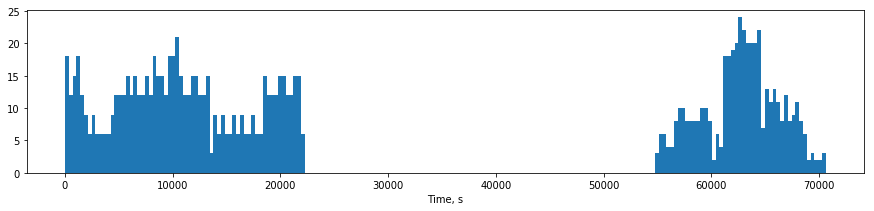

In [14]:
plt.figure(figsize=(15, 3))
plt.hist(time, bins=200)
plt.xlabel('Time, s')
plt.show()

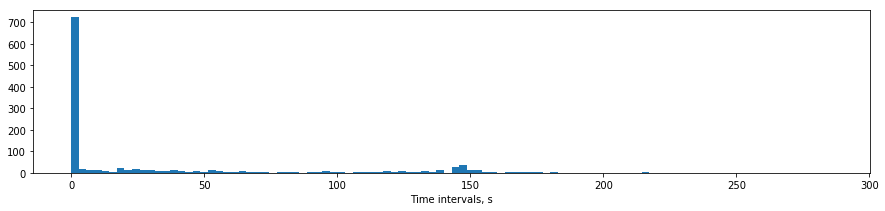

In [15]:
intervals = []
for i in range(1, len(time)):
    dt = time[i] - time[i-1]
    intervals.append(dt)
intervals = np.array(intervals)
intervals = intervals[intervals < 500]

plt.figure(figsize=(15, 3))
plt.hist(intervals, bins=100)
plt.xlabel('Time intervals, s')
plt.show()

# List of components with their states

In [16]:
failed_components = []

for comp in data.keys():
    data_comp = data[comp]
    try:
        health_states = np.unique(data_comp['health_state'].values)
        print("Component %s with health_states: " % (comp), health_states)
        if len(health_states) > 1:
            failed_components.append(comp)
    except:
        print("component %s has no health_state." % (comp))

Component c5f2100035 with health_states:  ['OK']
Component c5f210005a with health_states:  ['OK']
Component c5f2100069 with health_states:  ['OK']
Component c5f2100089 with health_states:  ['OK']
Component fc with health_states:  ['None']
Component scsi-35000cca25308c2bc with health_states:  ['OK']
Component scsi-35000cca2530e8b94 with health_states:  ['OK']
Component scsi-35000cca2530e931c with health_states:  ['OK']
Component scsi-35000cca2530eb470 with health_states:  ['OK']
Component scsi-35000cca25314a904 with health_states:  ['OK']
Component scsi-35000cca2531af214 with health_states:  ['OK']
Component scsi-35000cca2531e0fd8 with health_states:  ['OK']
Component scsi-35000cca2531f3ccc with health_states:  ['OK']
Component scsi-35000cca2531f3e10 with health_states:  ['OK']
Component scsi-35000cca2531f3f74 with health_states:  ['OK']
Component scsi-35000cca2531f481c with health_states:  ['OK']
Component scsi-35000cca253200f10 with health_states:  ['OK']
Component scsi-35000cca253202

Component scsi-35000cca2533674dc with health_states:  ['OK']
Component scsi-35000cca2533674ec with health_states:  ['OK']
Component scsi-35000cca253367550 with health_states:  ['OK']
Component scsi-35000cca253367560 with health_states:  ['OK']
Component scsi-35000cca253367574 with health_states:  ['OK']
Component scsi-35000cca253367678 with health_states:  ['OK']
Component scsi-35000cca25336773c with health_states:  ['OK']
Component scsi-35000cca253367784 with health_states:  ['OK']
Component scsi-35000cca2533677a8 with health_states:  ['OK']
Component scsi-35000cca2533677c8 with health_states:  ['OK']
Component scsi-35000cca2533677d0 with health_states:  ['OK']
Component scsi-35000cca2533677e0 with health_states:  ['OK']
Component scsi-35000cca253367814 with health_states:  ['OK']
Component scsi-35000cca253367840 with health_states:  ['OK']
Component scsi-35000cca2533678c4 with health_states:  ['OK']
Component scsi-35000cca2533678c8 with health_states:  ['OK']
Component scsi-35000cca2

# Data display

In [17]:
def plot_time_series(df, x_col, cols):
    
    for acol in cols:
        plt.figure(figsize=(15, 3))
        x = df[x_col].values
        y = df[acol].values
        plt.scatter(x, y, label=acol, s=5, alpha=1.)
        # plt.plot(x, y, label=acol)
        plt.xlabel(x_col)
        plt.ylabel(acol)
        plt.legend(loc='upper right')
        plt.show

In [18]:
failed_components

['sp-0-2-rdma0',
 'sp-0-2-rdma1',
 'sp-0-2',
 'sp-0-3-rdma0',
 'sp-0-3-rdma1',
 'sp-0-3']

(1166, 6)


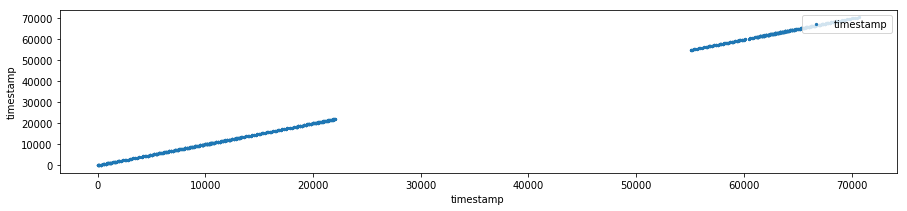

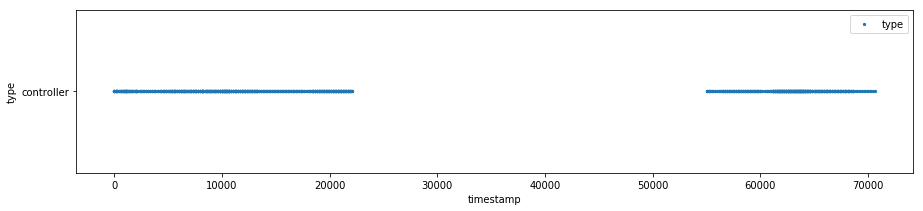

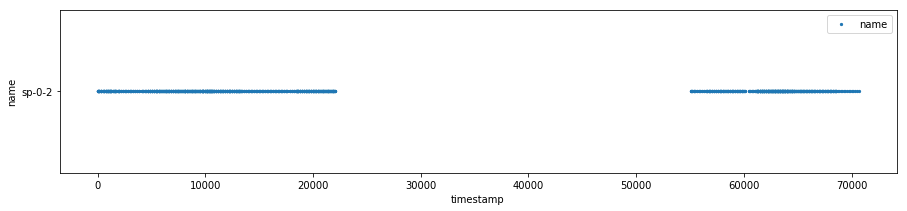

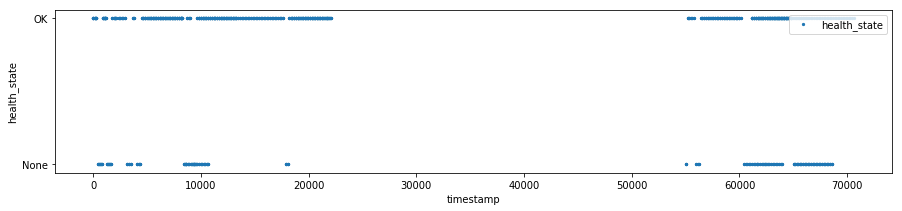

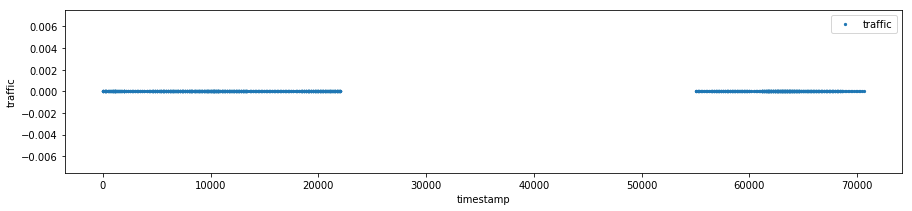

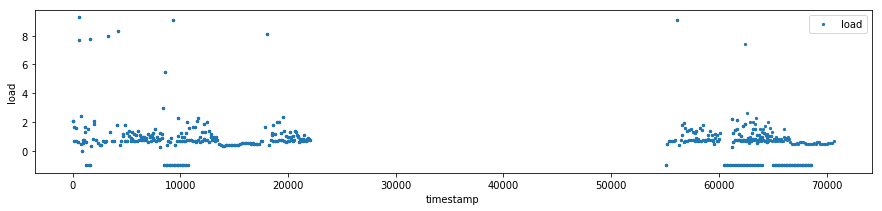

In [19]:
name = 'sp-0-2'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

(84, 4)


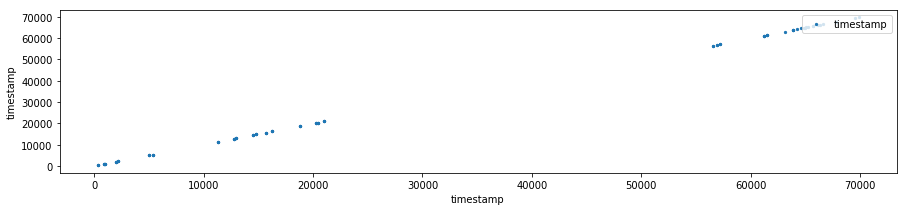

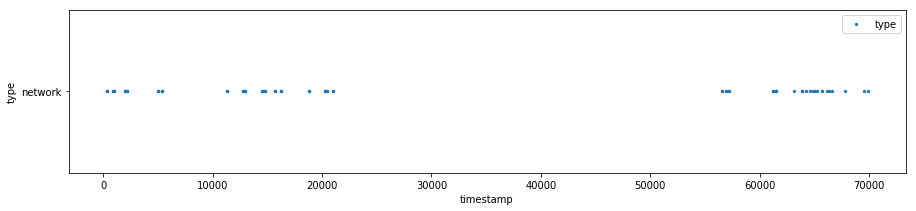

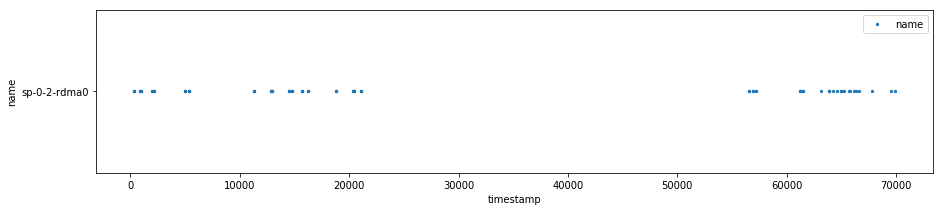

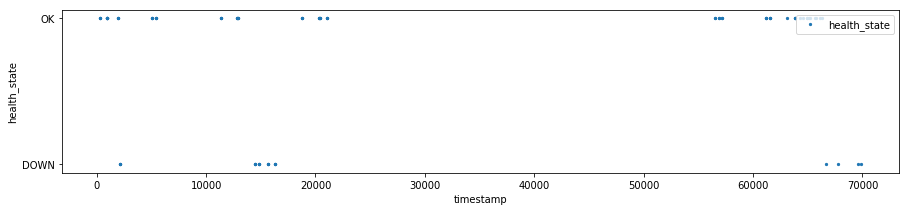

In [20]:
name = 'sp-0-2-rdma0'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

(826, 4)


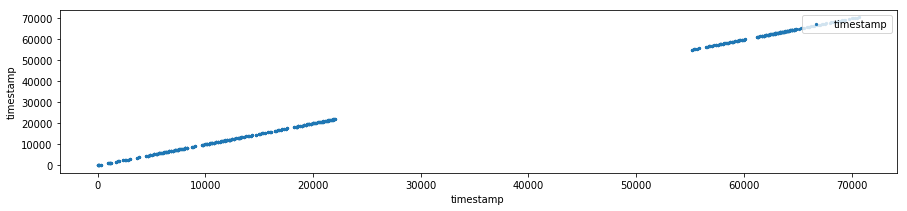

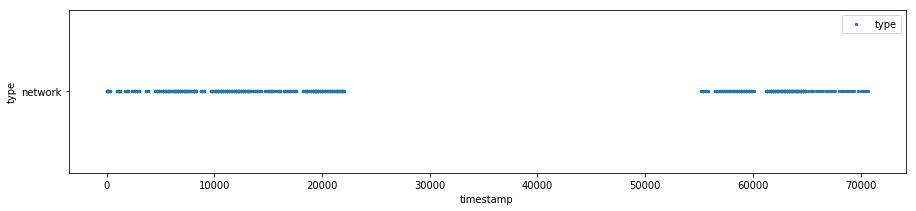

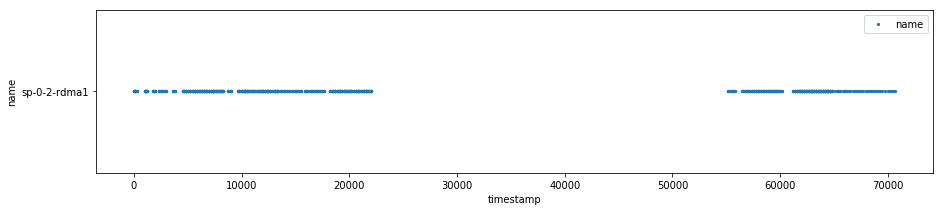

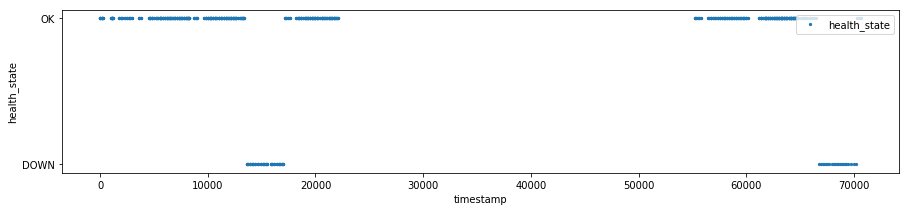

In [21]:
name = 'sp-0-2-rdma1'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

(1166, 6)


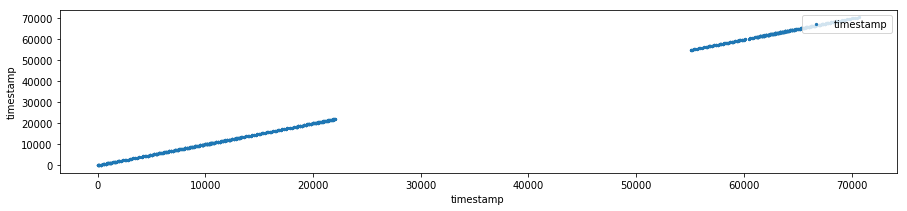

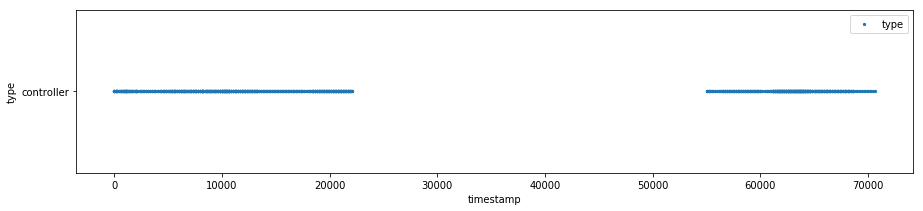

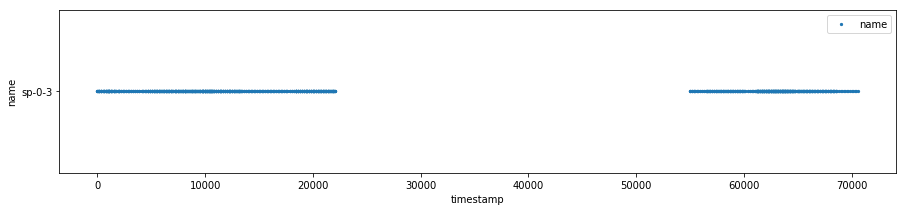

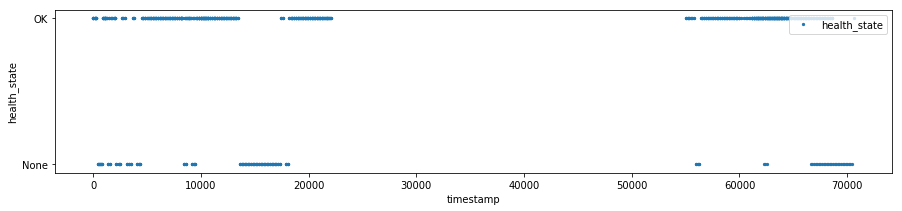

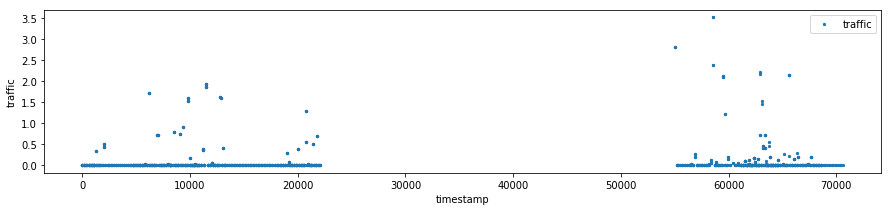

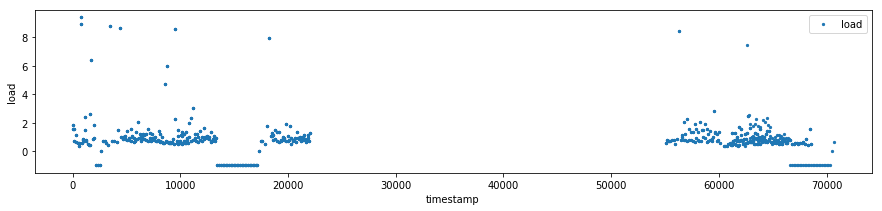

In [22]:
name = 'sp-0-3'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

(139, 4)


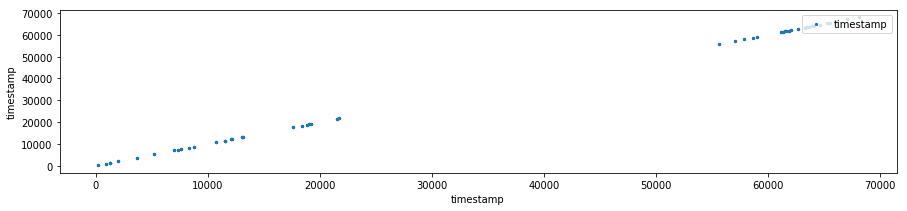

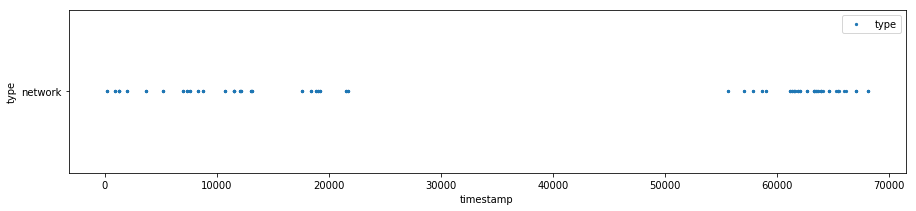

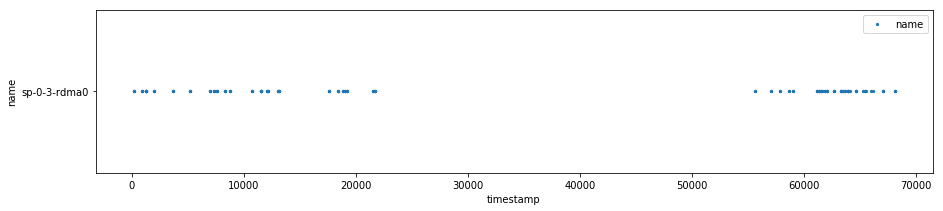

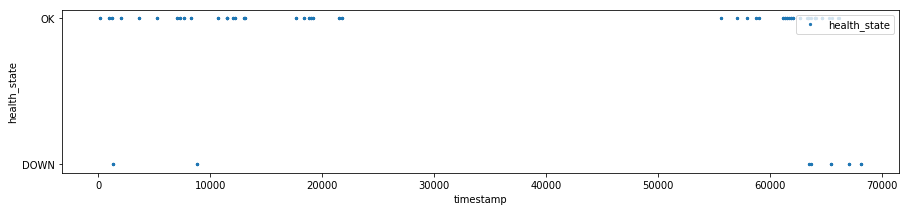

In [23]:
name = 'sp-0-3-rdma0'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

(844, 4)


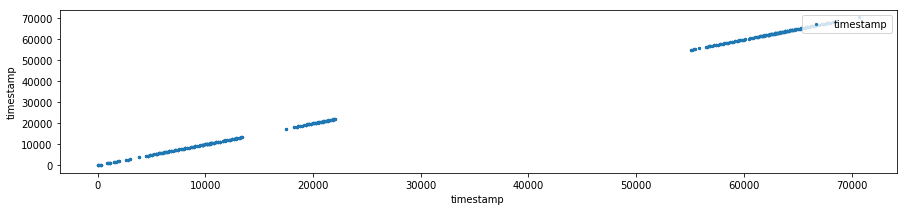

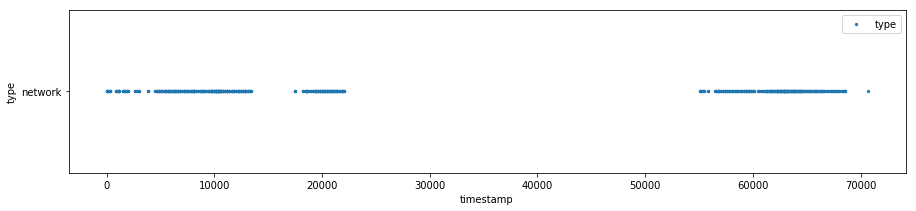

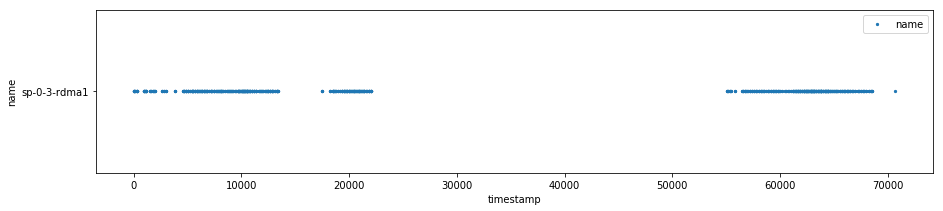

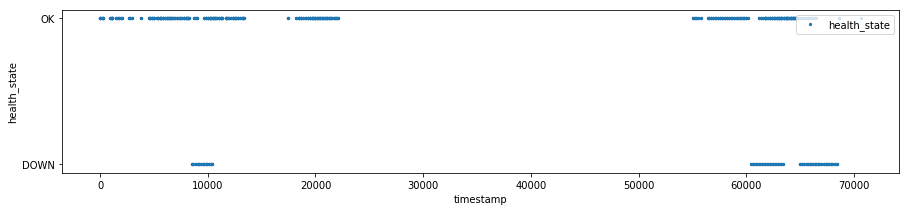

In [24]:
name = 'sp-0-3-rdma1'
print(data[name].shape)
plot_time_series(data[name], 'timestamp', data[name].columns)

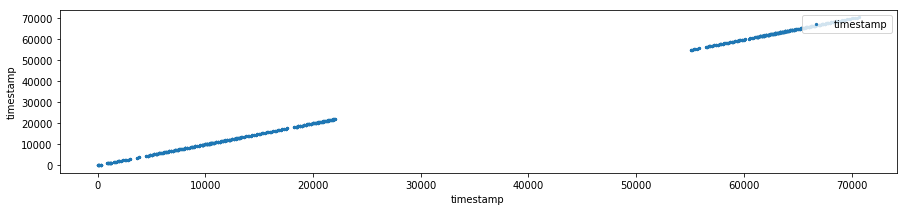

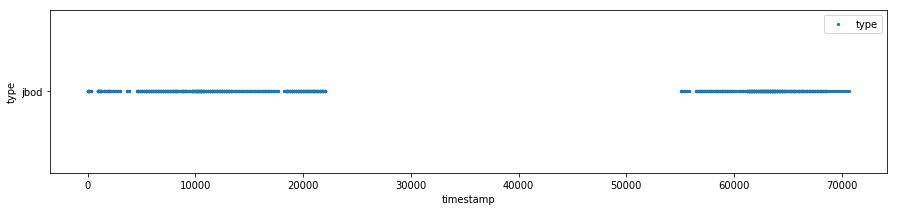

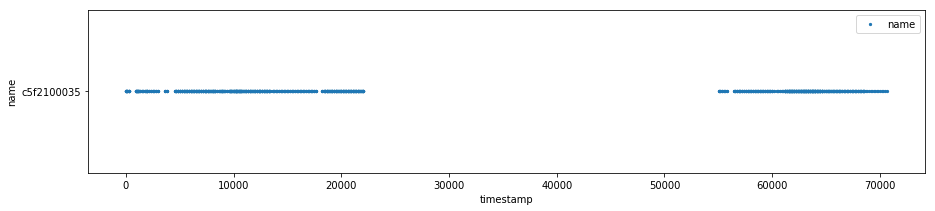

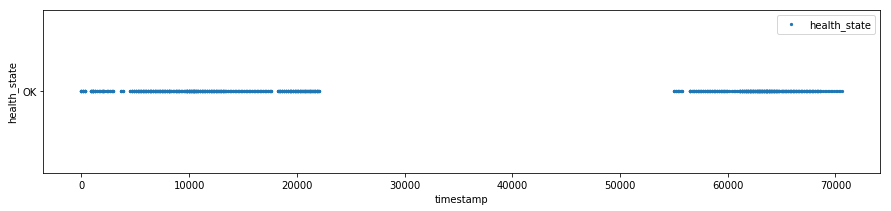

In [25]:
name = 'c5f2100035'
plot_time_series(data[name], 'timestamp', data[name].columns)

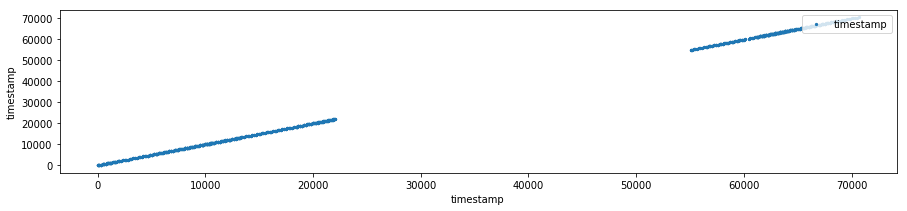

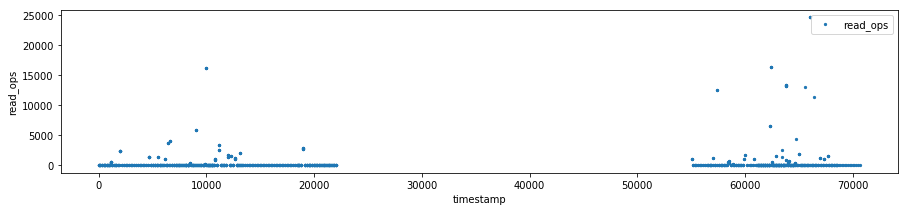

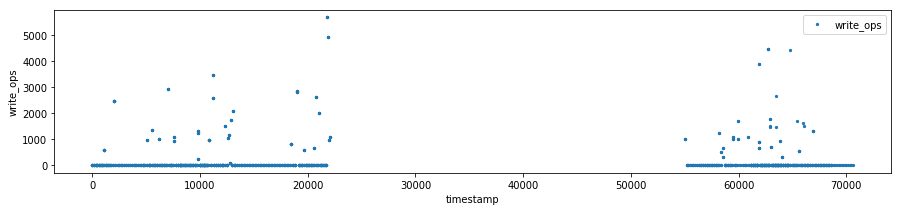

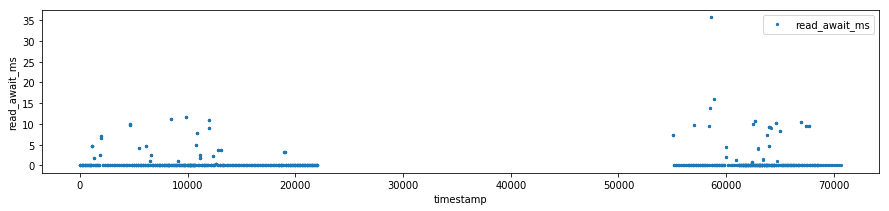

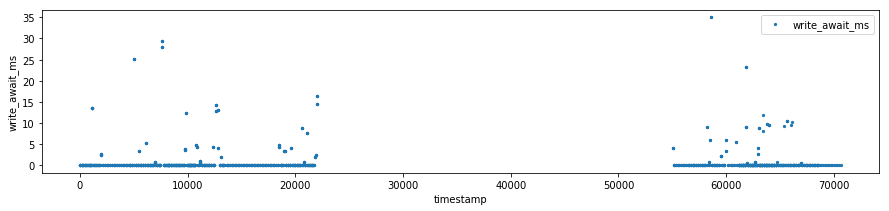

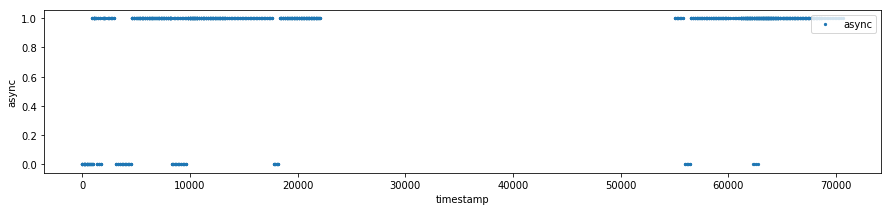

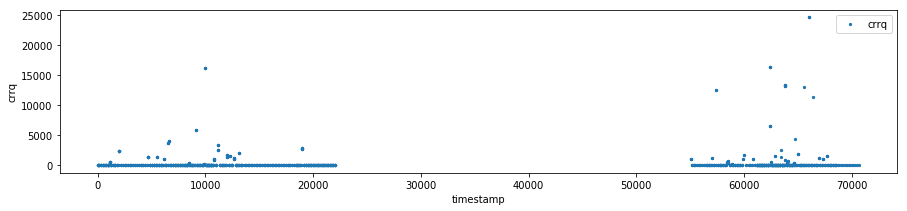

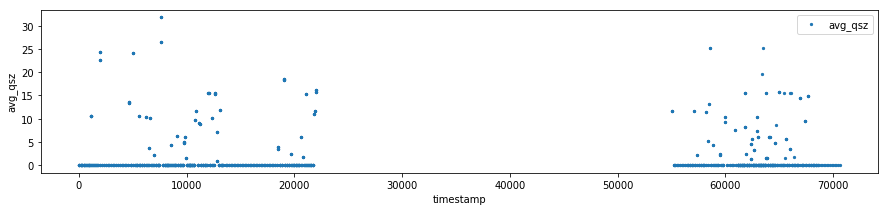

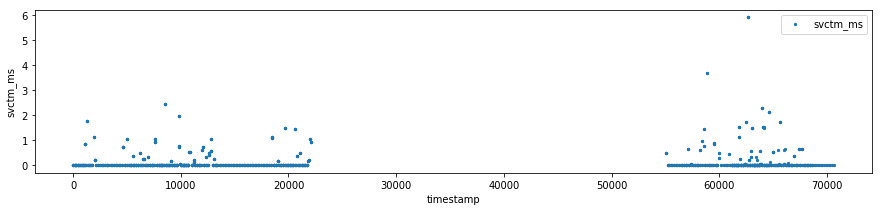

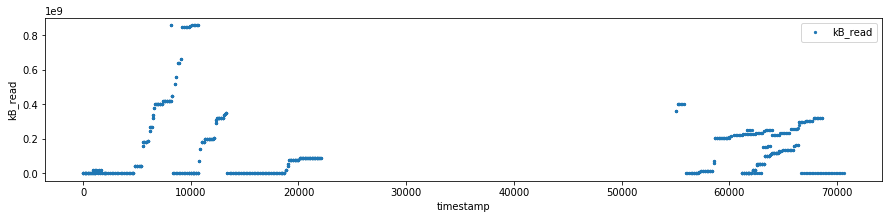

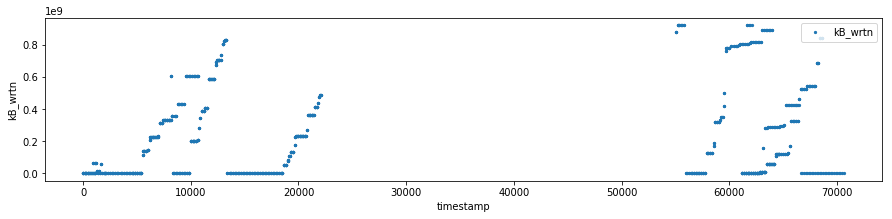

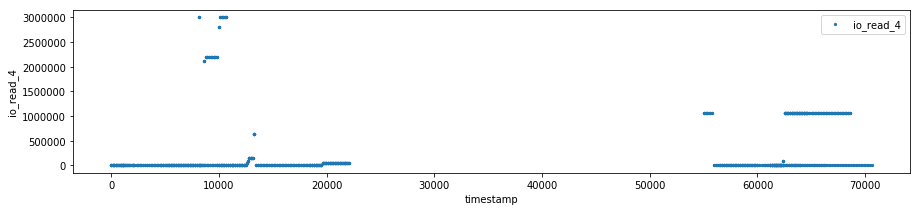

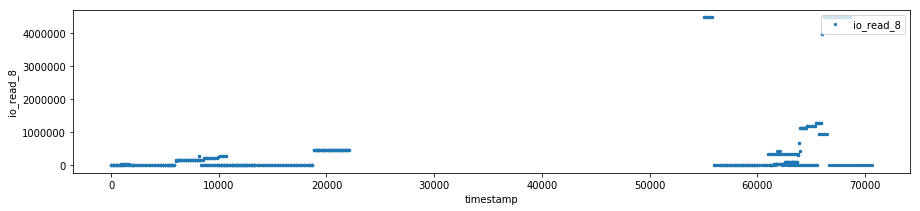

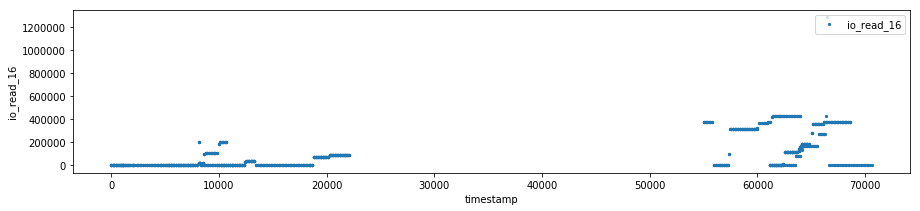

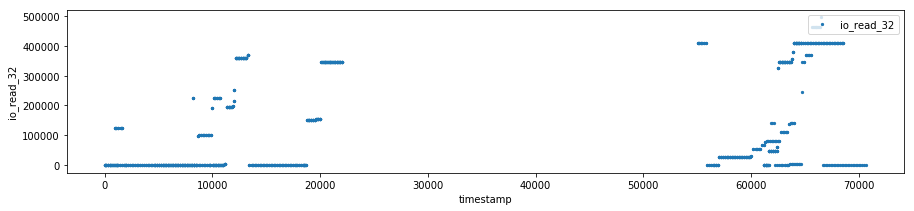

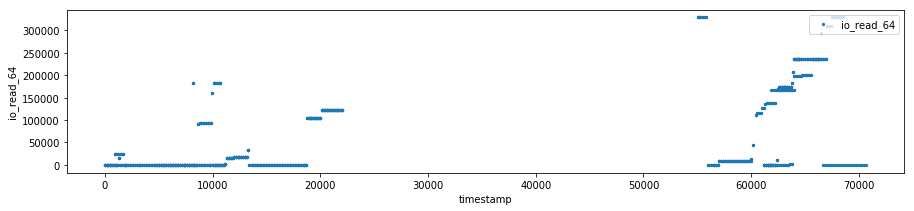

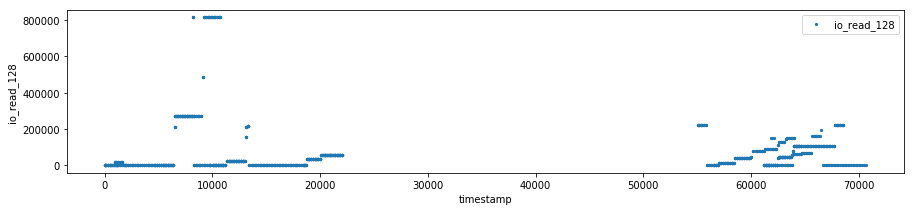

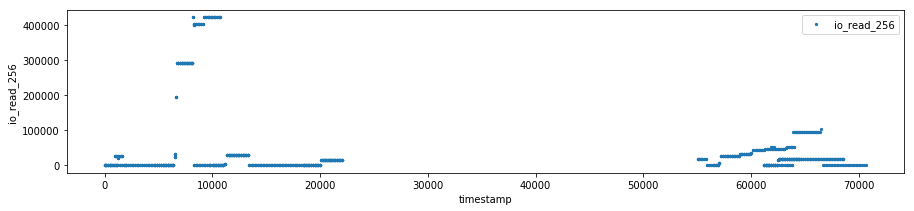

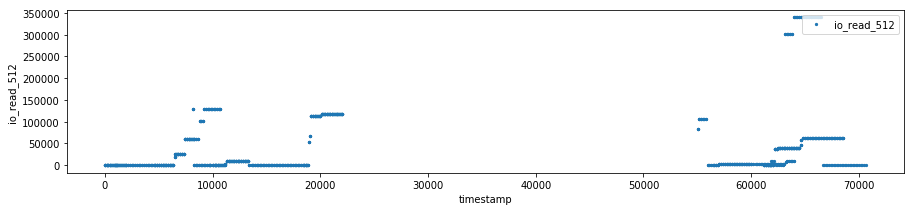

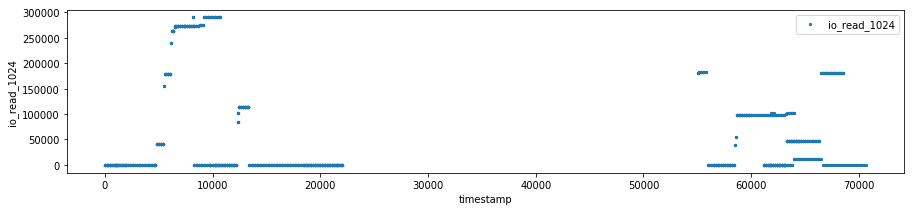

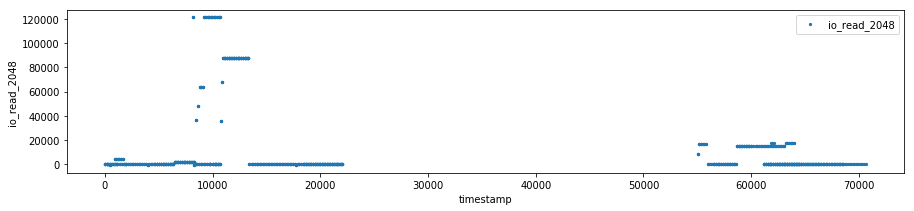

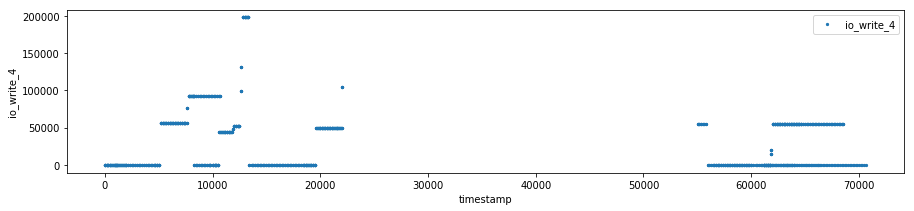

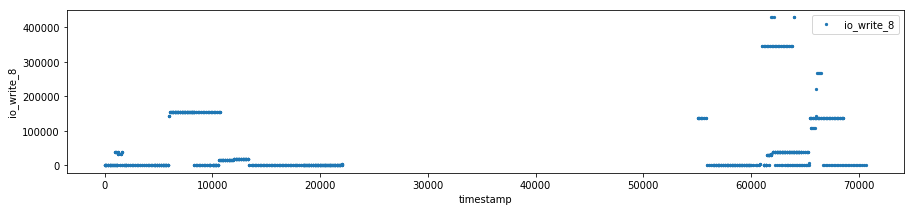

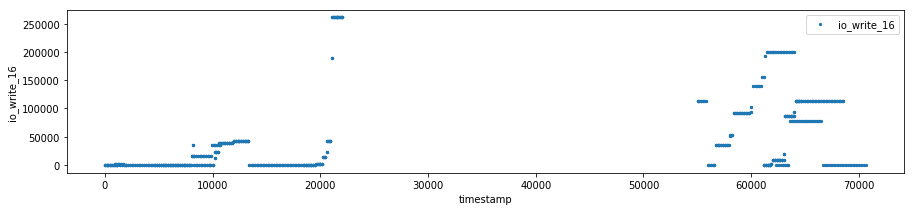

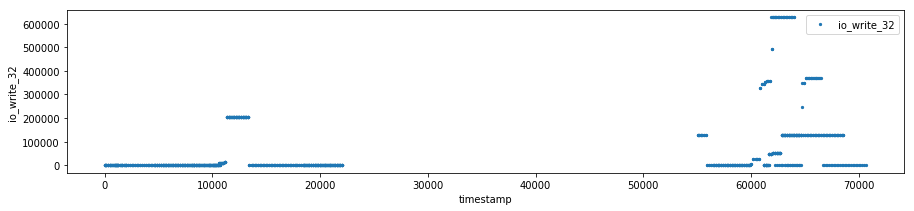

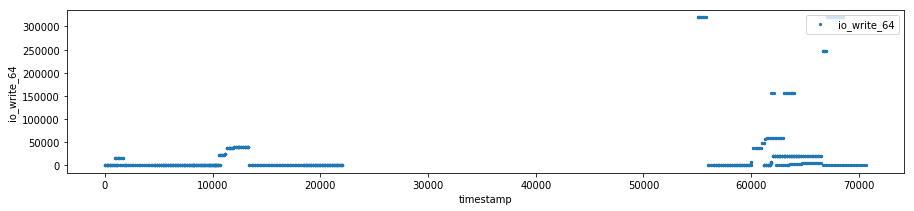

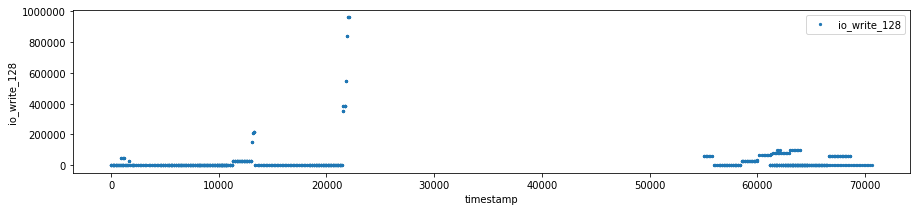

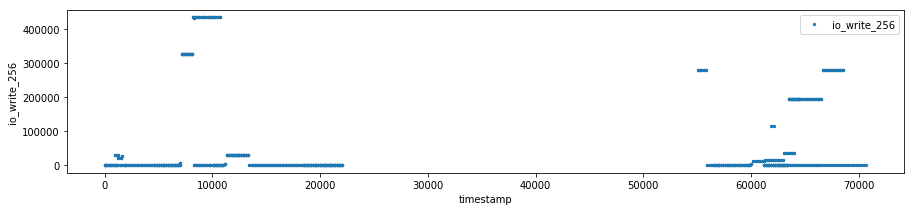

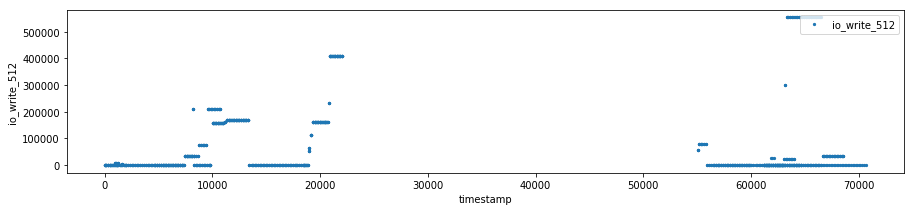

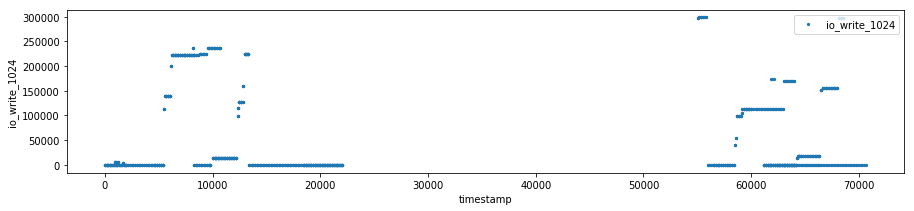

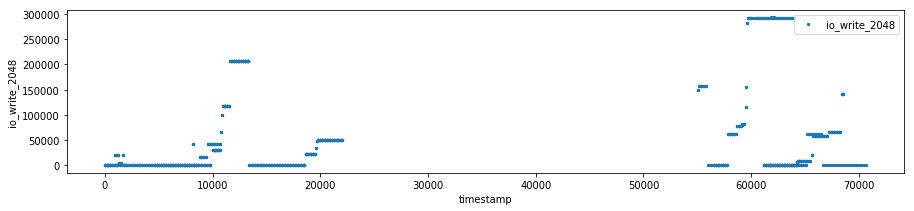

In [26]:
name = 'storage_state'
plot_time_series(data[name], 'timestamp', data[name].columns)

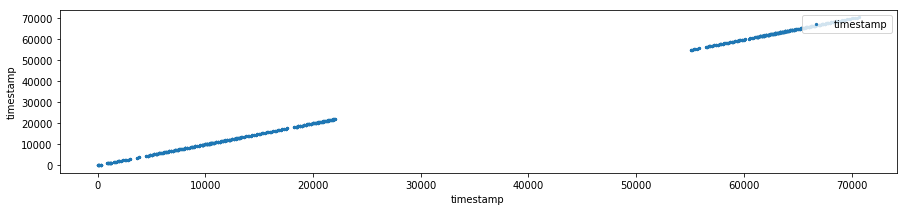

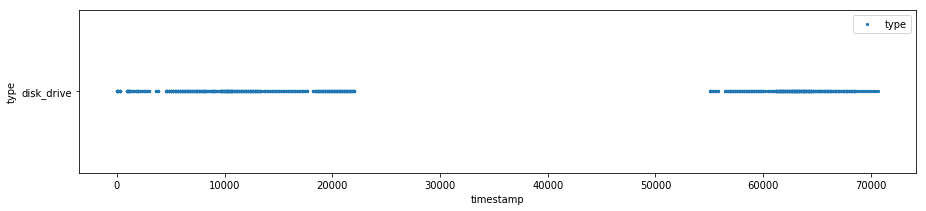

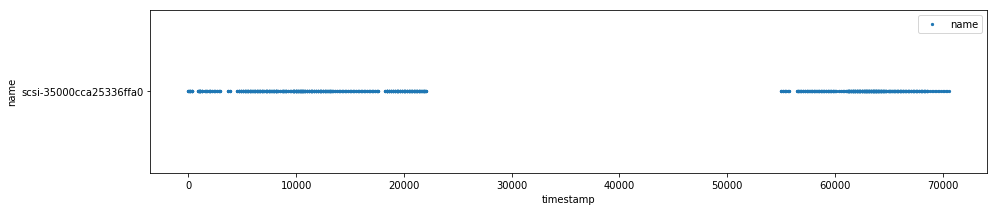

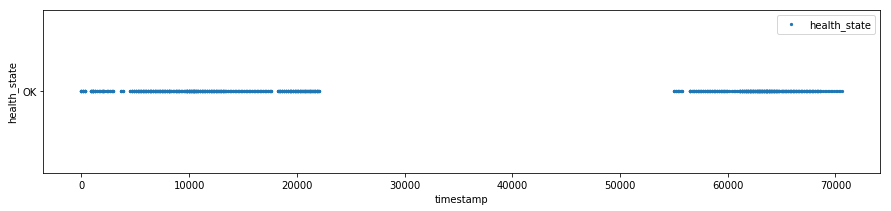

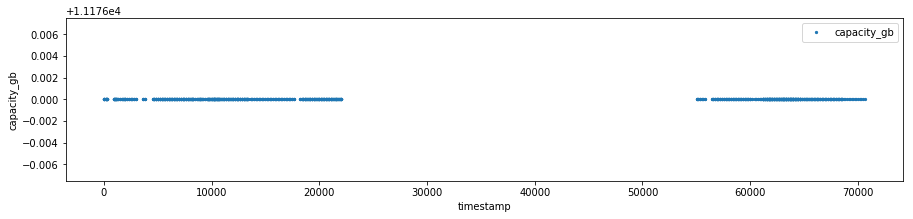

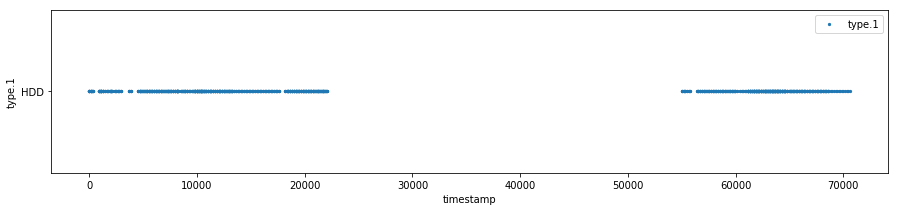

In [27]:
name = 'scsi-35000cca25336ffa0'
plot_time_series(data[name], 'timestamp', data[name].columns)

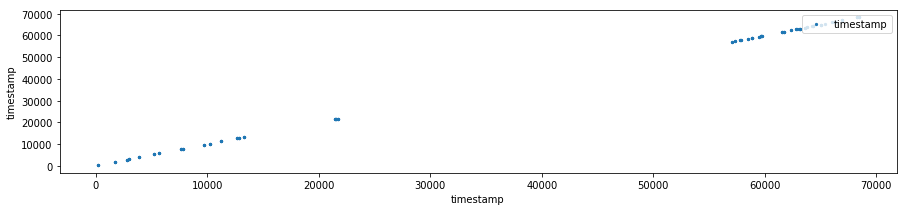

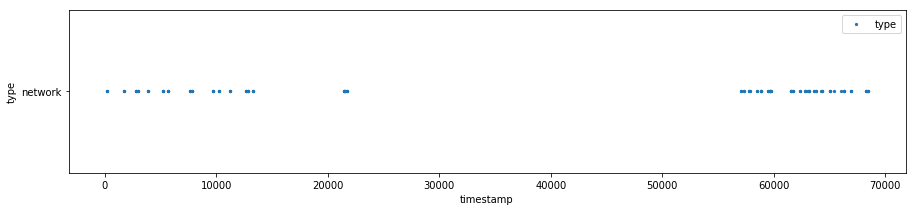

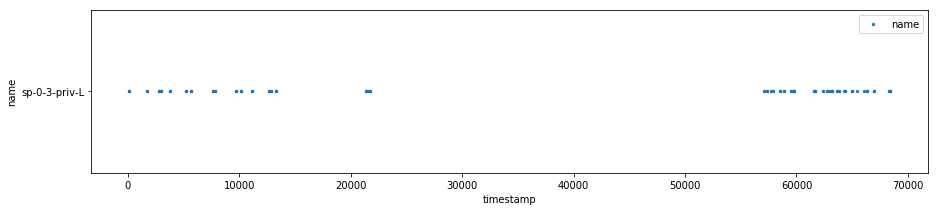

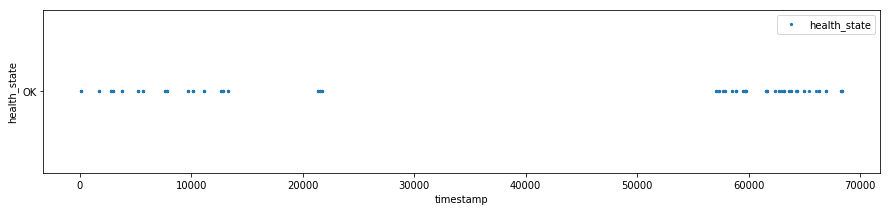

In [28]:
name = 'sp-0-3-priv-L'
plot_time_series(data[name], 'timestamp', data[name].columns)

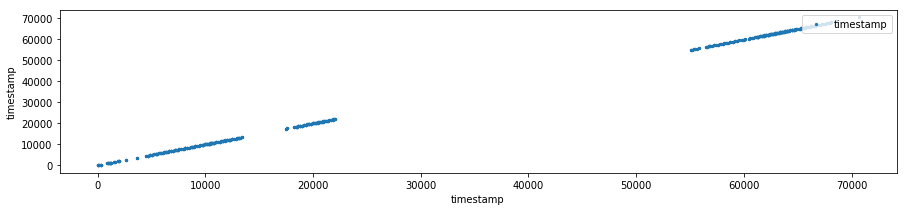

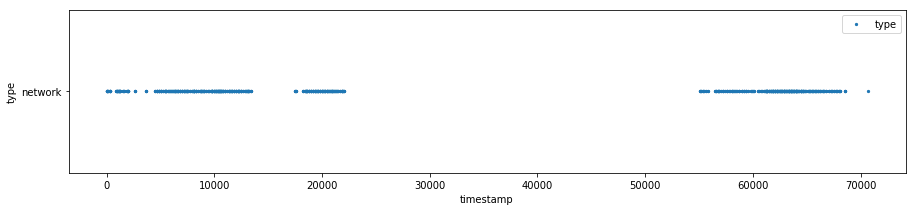

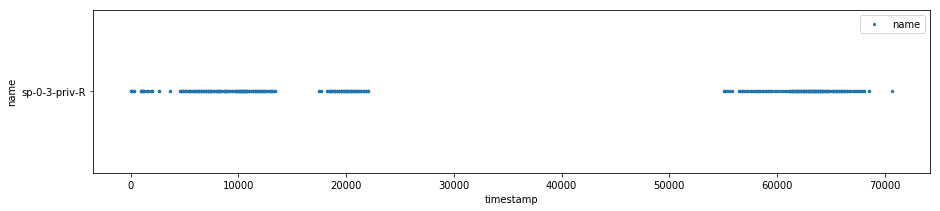

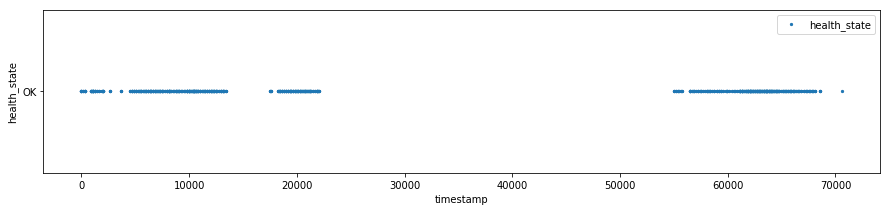

In [29]:
name = 'sp-0-3-priv-R'
plot_time_series(data[name], 'timestamp', data[name].columns)

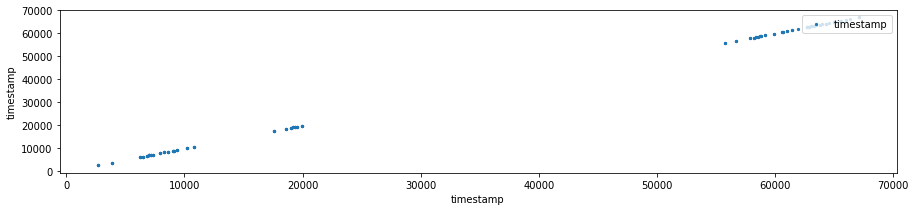

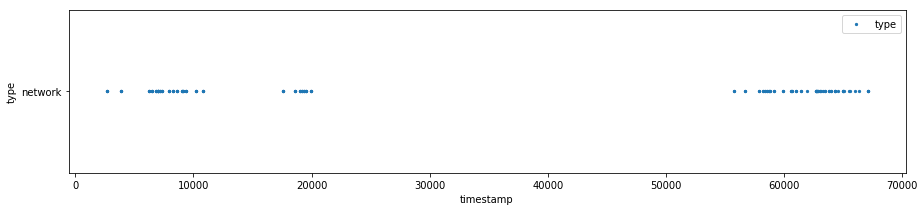

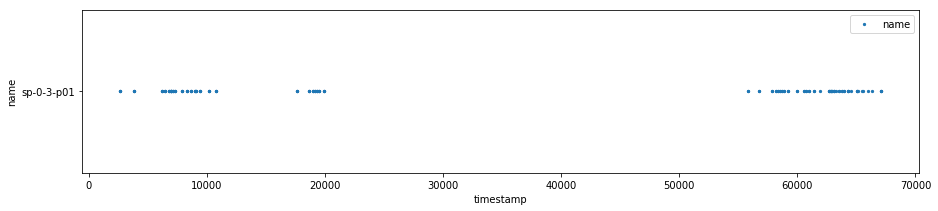

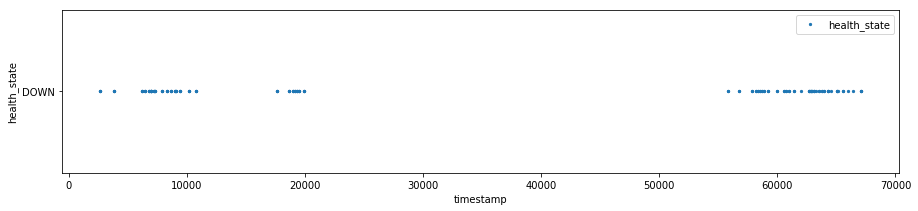

In [30]:
name = 'sp-0-3-p01'
plot_time_series(data[name], 'timestamp', data[name].columns)

# Train / Test data split

In [31]:
data.keys()

dict_keys(['c5f2100035', 'c5f210005a', 'c5f2100069', 'c5f2100089', 'fc', 'scsi-35000cca25308c2bc', 'scsi-35000cca2530e8b94', 'scsi-35000cca2530e931c', 'scsi-35000cca2530eb470', 'scsi-35000cca25314a904', 'scsi-35000cca2531af214', 'scsi-35000cca2531e0fd8', 'scsi-35000cca2531f3ccc', 'scsi-35000cca2531f3e10', 'scsi-35000cca2531f3f74', 'scsi-35000cca2531f481c', 'scsi-35000cca253200f10', 'scsi-35000cca253202250', 'scsi-35000cca253202258', 'scsi-35000cca253204290', 'scsi-35000cca25320f4fc', 'scsi-35000cca253215cc0', 'scsi-35000cca253215d88', 'scsi-35000cca253215fac', 'scsi-35000cca253233940', 'scsi-35000cca2532340d8', 'scsi-35000cca25324653c', 'scsi-35000cca253248554', 'scsi-35000cca253249974', 'scsi-35000cca2532499f4', 'scsi-35000cca253249ab8', 'scsi-35000cca253249b60', 'scsi-35000cca253252588', 'scsi-35000cca253260398', 'scsi-35000cca2532740b8', 'scsi-35000cca25327f6c4', 'scsi-35000cca25328700c', 'scsi-35000cca2532a4fa4', 'scsi-35000cca2532a4fb0', 'scsi-35000cca2532a6970', 'scsi-35000cca253

In [32]:
time_thresh = 50000

data_train = {}
data_test = {}

for companent_name in data.keys():
    
    # if companent_name not in ['sp-235-199', 'sp-4-113']:
    #     continue
    
    data_component = data[companent_name]
    data_component_train = data_component[data_component['timestamp'] < time_thresh]
    data_component_test = data_component[data_component['timestamp'] >= time_thresh]
    
    data_train[companent_name] = data_component_train
    data_test[companent_name] = data_component_test

# Prediction and diagnostic analysis

## General pipeline definition

In [33]:
from nostradamus.instruments import CrystalBall, FortuneWheel
import sklearn


def analysis_pipeline(component_name='sp-235-199', signal_state='None', 
                      window_size=100, slice_size=10, prediction_horizont=0, method='RandomForest'):

    # Hide DeprecationWarning
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)

    # Select a component data
    data_train_component = {component_name: data_train[component_name]}
    data_test_component = {component_name: data_test[component_name]}

    # Train nostradamus
    model_train = FortuneWheel(window_size=window_size, 
                               slice_size=slice_size, 
                               prediction_horizont=prediction_horizont, 
                               method=method, 
                               timestamp_column='timestamp', 
                               state_column='health_state')
    model_train.fit(data_train_component)
    model_train.save_model('model.pkl')

    # Use trained nostradamus for predictions
    model_pred = CrystalBall()
    model_pred.load_models('model.pkl')
    output = model_pred.predict(data_test_component)
    
    # Time shift
    output[component_name]['timestamp'] += prediction_horizont * window_size

    # Merge truth and predictions
    # predictions = output[component_name].merge(data_test_component[component_name], on='timestamp', how='inner')
    predictions = pd.merge_asof(output[component_name], data_test_component[component_name], on='timestamp', direction='nearest')

    # Get true and predicted labels and sample weights for balanced metrics
    y_pred = predictions[signal_state].values
    y_test = (predictions['health_state'].values == signal_state) * 1.
    weights = np.ones(len(y_test)) * (y_test == 0) + 1. * (y_test == 1) * ((y_test == 0).sum()) / ((y_test == 1).sum())
    print("Number of test points after the preprocessing: ", len(y_test))
    
    # Calculate metric values
    log_loss = sklearn.metrics.log_loss(y_test, y_pred)
    auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred >= 0.5, sample_weight=weights)
    precision = sklearn.metrics.precision_score(y_test, y_pred >= 0.5, sample_weight=weights)
    recall = sklearn.metrics.recall_score(y_test, y_pred >= 0.5, sample_weight=weights)
    f1 = sklearn.metrics.f1_score(y_test, y_pred >= 0.5, sample_weight=weights)
    
    return (predictions, log_loss, auc, accuracy, precision, recall, f1)

Using Theano backend.


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=200, 
                                                                                slice_size=5, 
                                                                                prediction_horizont=0, 
                                                                                method=clf)

log_loss, auc, accuracy, precision, recall, f1

Number of test points after the preprocessing:  74


(0.3847412440198166,
 0.9008620689655172,
 0.740301724137931,
 0.7686746987951807,
 0.6875,
 0.7258248009101251)

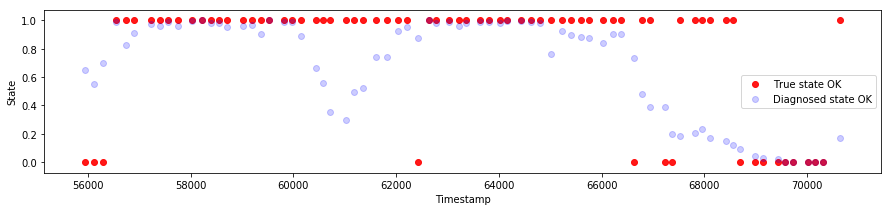

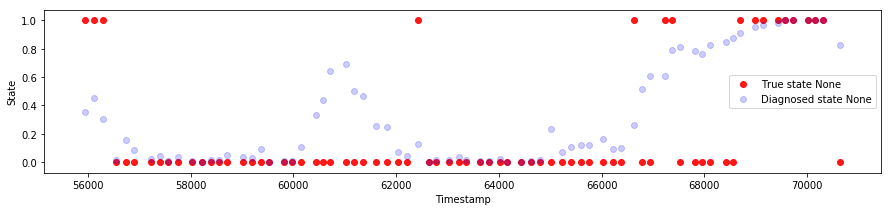

In [35]:
for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.2)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()

## Window size dependency analysis

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

metrics_columns = ['window_size', 'log_loss', 'auc', 'accuracy', 'precision', 'recall', 'f1']
metrics_data = []

window_sizes = np.arange(10, 310, 10)

for ws in window_sizes:
    
    print("Value %.2f is analysed..." % (ws))
    
    _, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                          signal_state='None', 
                                                                          window_size=ws, 
                                                                          slice_size=10, 
                                                                          prediction_horizont=0, 
                                                                          method=clf)
    
    metrics_data.append([ws, log_loss, auc, accuracy, precision, recall, f1])
    
metrics = pd.DataFrame(data=metrics_data, columns=metrics_columns)

Value 10.00 is analysed...
Number of test points after the preprocessing:  1551
Value 20.00 is analysed...
Number of test points after the preprocessing:  771
Value 30.00 is analysed...
Number of test points after the preprocessing:  511
Value 40.00 is analysed...
Number of test points after the preprocessing:  381
Value 50.00 is analysed...
Number of test points after the preprocessing:  303
Value 60.00 is analysed...
Number of test points after the preprocessing:  251
Value 70.00 is analysed...
Number of test points after the preprocessing:  214
Value 80.00 is analysed...
Number of test points after the preprocessing:  186
Value 90.00 is analysed...
Number of test points after the preprocessing:  165
Value 100.00 is analysed...
Number of test points after the preprocessing:  147
Value 110.00 is analysed...
Number of test points after the preprocessing:  133
Value 120.00 is analysed...
Number of test points after the preprocessing:  121
Value 130.00 is analysed...
Number of test point

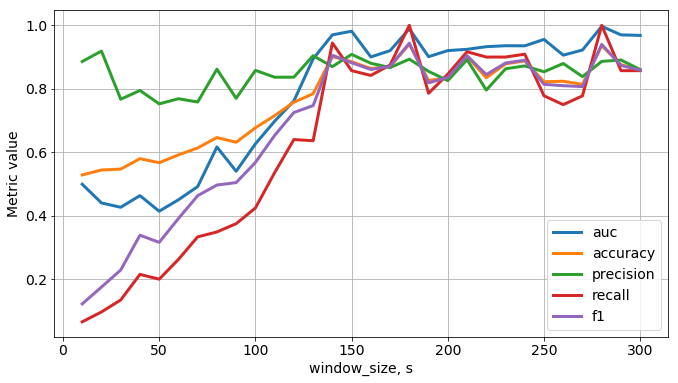

In [37]:
plt.figure(figsize=(11, 6))
plt.plot(metrics['window_size'].values, metrics['auc'].values, label='auc', linewidth=3)
plt.plot(metrics['window_size'].values, metrics['accuracy'].values, label='accuracy', linewidth=3)
plt.plot(metrics['window_size'].values, metrics['precision'].values, label='precision', linewidth=3)
plt.plot(metrics['window_size'].values, metrics['recall'].values, label='recall', linewidth=3)
plt.plot(metrics['window_size'].values, metrics['f1'].values, label='f1', linewidth=3)
plt.xlabel('window_size, s', size=14)
plt.ylabel('Metric value', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Number of test points after the preprocessing:  69
Log_loss:  0.33222704904295713
auc:  0.9203296703296704
accuracy:  0.8337912087912088
precision:  0.8257372654155497
recall:  0.8461538461538461
f1:  0.8358208955223881


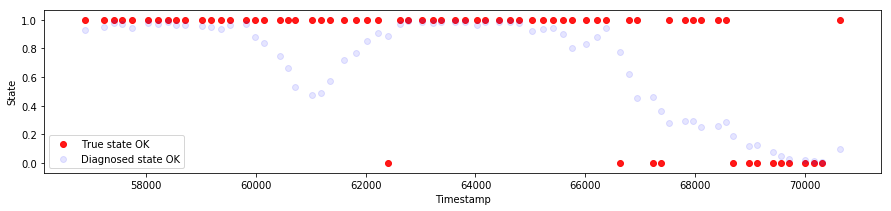

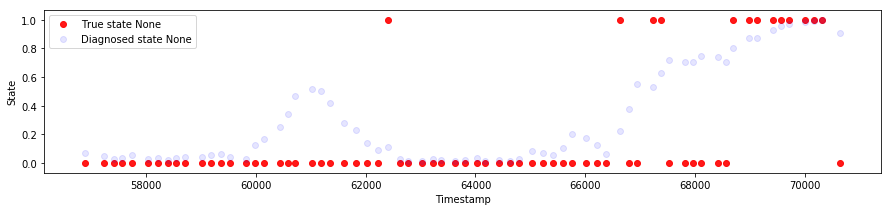

None     OK  Unknown     timestamp        type    name health_state  \
0  0.070  0.930      0.0  56889.116204  controller  sp-0-3           OK   
1  0.050  0.950      0.0  57226.655635  controller  sp-0-3           OK   
2  0.026  0.974      0.0  57408.455234  controller  sp-0-3           OK   
3  0.033  0.967      0.0  57562.213605  controller  sp-0-3           OK   
4  0.057  0.943      0.0  57751.201352  controller  sp-0-3           OK   

    traffic  load  
0  0.274868  1.22  
1  0.000000  1.57  
2  0.000000  1.37  
3  0.000000  1.33  
4  0.000000  1.94

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=200, 
                                                                                slice_size=10, 
                                                                                prediction_horizont=0, 
                                                                                method=clf)

print("Log_loss: ", log_loss)
print("auc: ", auc)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.1)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()
    
predictions.head(5)

## Slice size dependency analysis

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

metrics_columns = ['slice_size', 'log_loss', 'auc', 'accuracy', 'precision', 'recall', 'f1']
metrics_data = []

slice_size = np.arange(1, 52, 2)

for ss in slice_size:
    
    print("Value %.2f is analysed..." % (ss))
    
    _, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                          signal_state='None', 
                                                                          window_size=200, 
                                                                          slice_size=ss, 
                                                                          prediction_horizont=0, 
                                                                          method=clf)
    
    metrics_data.append([ss, log_loss, auc, accuracy, precision, recall, f1])
    
metrics = pd.DataFrame(data=metrics_data, columns=metrics_columns)

Value 1.00 is analysed...
Number of test points after the preprocessing:  78
Value 3.00 is analysed...
Number of test points after the preprocessing:  76
Value 5.00 is analysed...
Number of test points after the preprocessing:  74
Value 7.00 is analysed...
Number of test points after the preprocessing:  72
Value 9.00 is analysed...
Number of test points after the preprocessing:  70
Value 11.00 is analysed...
Number of test points after the preprocessing:  68
Value 13.00 is analysed...
Number of test points after the preprocessing:  66
Value 15.00 is analysed...
Number of test points after the preprocessing:  64
Value 17.00 is analysed...
Number of test points after the preprocessing:  62
Value 19.00 is analysed...
Number of test points after the preprocessing:  60
Value 21.00 is analysed...
Number of test points after the preprocessing:  58
Value 23.00 is analysed...
Number of test points after the preprocessing:  56
Value 25.00 is analysed...
Number of test points after the preprocess

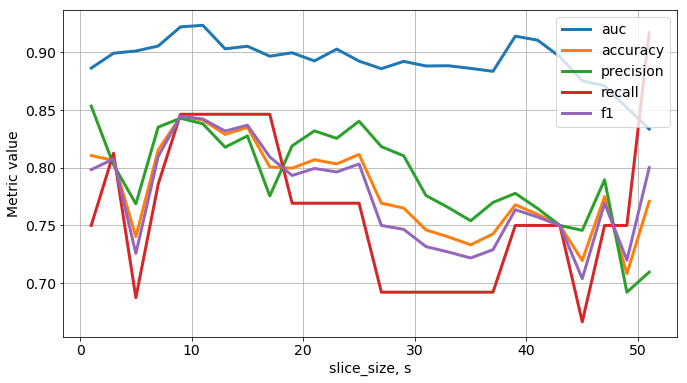

In [40]:
plt.figure(figsize=(11, 6))
plt.plot(metrics['slice_size'].values, metrics['auc'].values, label='auc', linewidth=3)
plt.plot(metrics['slice_size'].values, metrics['accuracy'].values, label='accuracy', linewidth=3)
plt.plot(metrics['slice_size'].values, metrics['precision'].values, label='precision', linewidth=3)
plt.plot(metrics['slice_size'].values, metrics['recall'].values, label='recall', linewidth=3)
plt.plot(metrics['slice_size'].values, metrics['f1'].values, label='f1', linewidth=3)
plt.xlabel('slice_size, s', size=14)
plt.ylabel('Metric value', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Number of test points after the preprocessing:  107
Log_loss:  0.5878553370954926
auc:  0.652077807250221
accuracy:  0.6423519009725907
precision:  0.9236842105263158
recall:  0.3103448275862069
f1:  0.4645929847782925


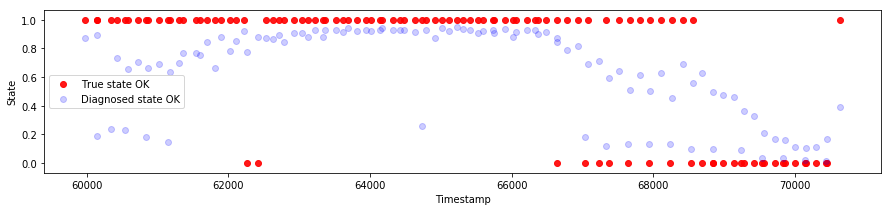

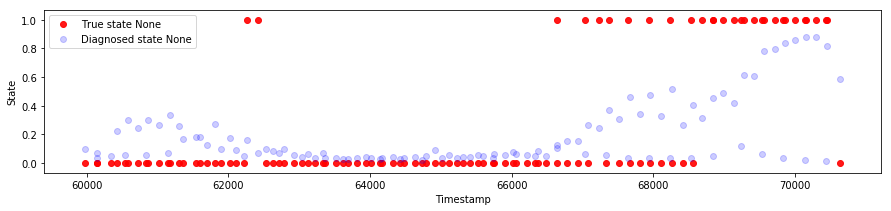

None     OK  Unknown     timestamp        type    name health_state  \
0  0.098  0.873    0.029  59974.925874  controller  sp-0-3           OK   
1  0.034  0.190    0.776  60140.258738  controller  sp-0-3           OK   
2  0.071  0.890    0.039  60146.025629  controller  sp-0-3           OK   
3  0.049  0.238    0.713  60340.258738  controller  sp-0-3           OK   
4  0.222  0.732    0.046  60431.979197  controller  sp-0-3           OK   

    traffic  load  
0  0.187007  1.32  
1  0.000000  0.58  
2  0.000000  0.58  
3  0.038805  0.38  
4  0.038805  0.38

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=100, 
                                                                                slice_size=50, 
                                                                                prediction_horizont=0, 
                                                                                method=clf)

print("Log_loss: ", log_loss)
print("auc: ", auc)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.2)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()
    
predictions.head(5)

## Prediction horisont dependency analysis

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

metrics_columns = ['prediction_horizont', 'log_loss', 'auc', 'accuracy', 'precision', 'recall', 'f1']
metrics_data = []

prediction_horizont = np.arange(0, 60, 5)

for pr in prediction_horizont:
    
    print("Value %.2f is analysed..." % (pr))
    
    _, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                          signal_state='None', 
                                                                          window_size=200, 
                                                                          slice_size=10, 
                                                                          prediction_horizont=pr, 
                                                                          method=clf)
    
    metrics_data.append([pr, log_loss, auc, accuracy, precision, recall, f1])
    
metrics = pd.DataFrame(data=metrics_data, columns=metrics_columns)

Value 0.00 is analysed...
Number of test points after the preprocessing:  69
Value 5.00 is analysed...
Number of test points after the preprocessing:  69
Value 10.00 is analysed...
Number of test points after the preprocessing:  69
Value 15.00 is analysed...
Number of test points after the preprocessing:  69
Value 20.00 is analysed...
Number of test points after the preprocessing:  69
Value 25.00 is analysed...
Number of test points after the preprocessing:  69
Value 30.00 is analysed...
Number of test points after the preprocessing:  69
Value 35.00 is analysed...
Number of test points after the preprocessing:  69
Value 40.00 is analysed...
Number of test points after the preprocessing:  69
Value 45.00 is analysed...
Number of test points after the preprocessing:  69
Value 50.00 is analysed...
Number of test points after the preprocessing:  69
Value 55.00 is analysed...
Number of test points after the preprocessing:  69


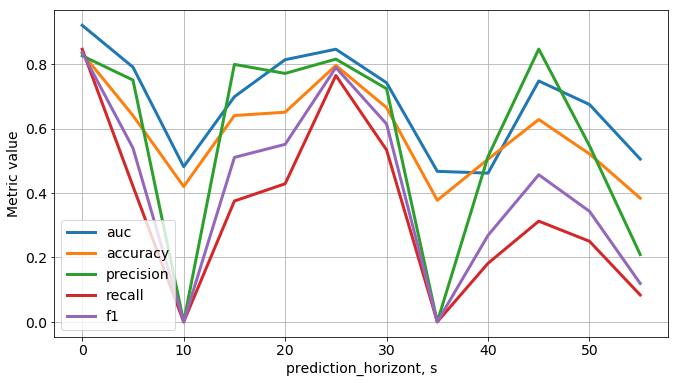

In [43]:
plt.figure(figsize=(11, 6))
plt.plot(metrics['prediction_horizont'].values, metrics['auc'].values, label='auc', linewidth=3)
plt.plot(metrics['prediction_horizont'].values, metrics['accuracy'].values, label='accuracy', linewidth=3)
plt.plot(metrics['prediction_horizont'].values, metrics['precision'].values, label='precision', linewidth=3)
plt.plot(metrics['prediction_horizont'].values, metrics['recall'].values, label='recall', linewidth=3)
plt.plot(metrics['prediction_horizont'].values, metrics['f1'].values, label='f1', linewidth=3)
plt.xlabel('prediction_horizont, s', size=14)
plt.ylabel('Metric value', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Number of test points after the preprocessing:  69
Log_loss:  0.4584370266510699
auc:  0.8461538461538461
accuracy:  0.7958144796380089
precision:  0.8154402895054282
recall:  0.764705882352941
f1:  0.789258610624635


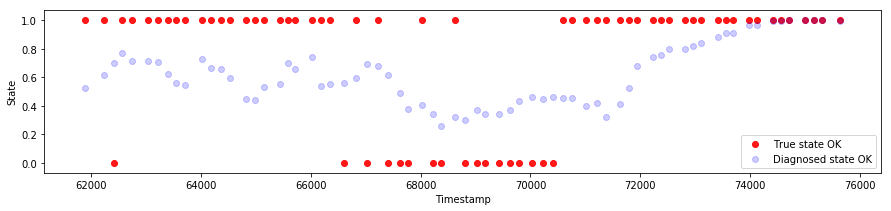

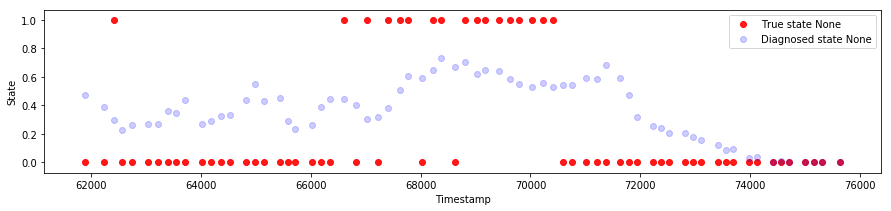

None     OK  Unknown     timestamp        type    name health_state  \
0  0.472  0.527    0.001  61889.116204  controller  sp-0-3           OK   
1  0.386  0.614    0.000  62226.655635  controller  sp-0-3           OK   
2  0.295  0.701    0.004  62408.455234  controller  sp-0-3         None   
3  0.229  0.771    0.000  62562.213605  controller  sp-0-3           OK   
4  0.265  0.714    0.021  62751.201352  controller  sp-0-3           OK   

    traffic  load  
0  0.119547  0.43  
1  0.000000  0.81  
2  0.000000  0.37  
3  0.000000  1.25  
4  0.000000  2.56

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=200, 
                                                                                slice_size=10, 
                                                                                prediction_horizont=25, 
                                                                                method=clf)

print("Log_loss: ", log_loss)
print("auc: ", auc)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.2)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()
    
predictions.head(5)

## Methods dependency analysis

### Original classifiers

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import keras
from nostradamus import classifiers


clf0 = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

clf1 = LogisticRegression()

clf2 = XGBClassifier(objective='binary:logistic', n_estimators=1000, max_depth=6, 
                     learning_rate=0.1, colsample_bytree=0.7)

clf3 = classifiers.KerasOneLayerNN(hidden_dim=100, nb_epoch=100, batch_size=32, patience=2)

clf4 = classifiers.KerasDeepNN(hidden_dim=100, n_hidden_layers=3, dropout=0.1, 
                               nb_epoch=100, batch_size=32, patience=2)

In [46]:
%%time

metrics_columns = ['model', 'log_loss', 'auc', 'accuracy', 'precision', 'recall', 'f1']
metrics_data = []

models = [clf0, clf1, clf2, clf3, clf4]

for i_model in range(len(models)):
    
    print("Value %.2f is analysed..." % (i_model))
    
    _, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                          signal_state='None', 
                                                                          window_size=100, 
                                                                          slice_size=10, 
                                                                          prediction_horizont=0, 
                                                                          method=models[i_model])
    
    metrics_data.append([i_model, log_loss, auc, accuracy, precision, recall, f1])
    
metrics = pd.DataFrame(data=metrics_data, columns=metrics_columns)

Value 0.00 is analysed...
Number of test points after the preprocessing:  147
Value 1.00 is analysed...
Number of test points after the preprocessing:  147
Value 2.00 is analysed...
Number of test points after the preprocessing:  147
Value 3.00 is analysed...
Number of test points after the preprocessing:  147
Value 4.00 is analysed...
Number of test points after the preprocessing:  147
CPU times: user 12.2 s, sys: 842 ms, total: 13 s
Wall time: 16.8 s


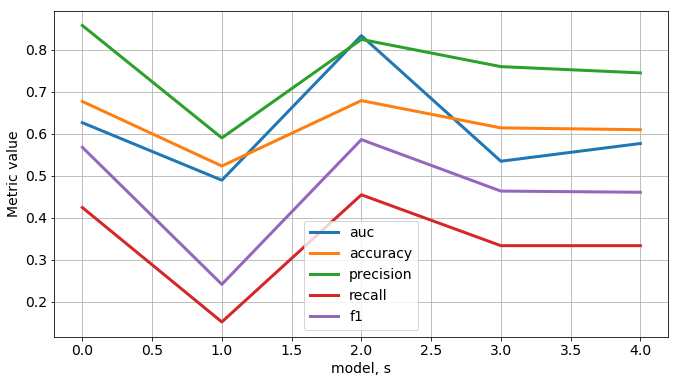

In [47]:
plt.figure(figsize=(11, 6))
plt.plot(metrics['model'].values, metrics['auc'].values, label='auc', linewidth=3)
plt.plot(metrics['model'].values, metrics['accuracy'].values, label='accuracy', linewidth=3)
plt.plot(metrics['model'].values, metrics['precision'].values, label='precision', linewidth=3)
plt.plot(metrics['model'].values, metrics['recall'].values, label='recall', linewidth=3)
plt.plot(metrics['model'].values, metrics['f1'].values, label='f1', linewidth=3)
plt.xlabel('model, s', size=14)
plt.ylabel('Metric value', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Number of test points after the preprocessing:  147
Log_loss:  1.23549505153727
auc:  0.6263955342902711
accuracy:  0.6770334928229664
precision:  0.8580645161290322
recall:  0.42424242424242425
f1:  0.567769477054429


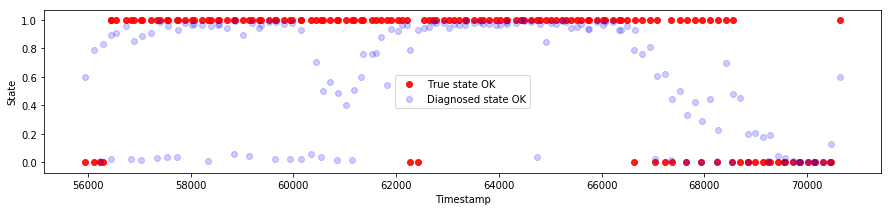

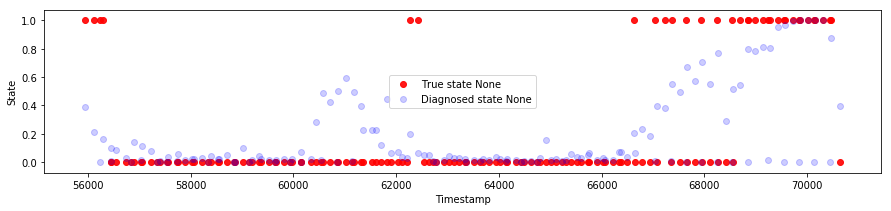

None     OK  Unknown     timestamp        type    name health_state  \
0  0.389  0.601    0.010  55944.757984  controller  sp-0-3         None   
1  0.212  0.785    0.003  56110.311589  controller  sp-0-3         None   
2  0.003  0.012    0.985  56240.258738  controller  sp-0-3         None   
3  0.165  0.831    0.004  56284.073663  controller  sp-0-3         None   
4  0.011  0.027    0.962  56440.258738  controller  sp-0-3           OK   

   traffic  load  
0      0.0  0.51  
1      0.0  0.84  
2      0.0  8.44  
3      0.0  8.44  
4      0.0  0.77

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto', 
                                 class_weight='balanced', n_jobs=-1, random_state=11)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=100, 
                                                                                slice_size=10, 
                                                                                prediction_horizont=0, 
                                                                                method=clf)

print("Log_loss: ", log_loss)
print("auc: ", auc)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.2)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()
    
predictions.head(5)

### Jarvis classifiers

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import keras
from nostradamus import classifiers


config1 = {'RandomForest': {'estimator': RandomForestClassifier(n_estimators=1000), 
                            'params': {'max_depth': [3, 6, None], 
                                       'min_samples_leaf': [1, 10, 50], 
                                       'max_features': [None, 'auto', 0.8]}}}
clf1 = classifiers.JarvisClassifier(verbose=1)
clf1.set_config(config1)


config2 = {'LogisticRegresion': {'estimator': LogisticRegression(),
                                 'params': {'C': [5, 2, 1.5, 1, 0.5, 0.1, 0.01]}}}
clf2 = classifiers.JarvisClassifier(verbose=1)
clf2.set_config(config2)


config3 = {'XGBoost': {'estimator': XGBClassifier(objective='binary:logistic', n_estimators=1000),
                        'params': {'max_depth': [3, 4, 6, 8],
                                   'min_child_weight': [1, 10],
                                   'learning_rate': [0.1, 0.05, 0.01],
                                   'colsample_bytree': [0.7, 1]}}}
clf3 = classifiers.JarvisClassifier(verbose=1)
clf3.set_config(config3)


config4 = {'OneLayerNN': {'estimator': classifiers.KerasOneLayerNN(nb_epoch=100, batch_size=32, patience=2),
                          'params': {'hidden_dim': [10, 30, 100]}}}
clf4 = classifiers.JarvisClassifier(verbose=1)
clf4.set_config(config4)


config5 = {'DeepNN': {'estimator': classifiers.KerasDeepNN(nb_epoch=100, batch_size=32, patience=2),
                      'params': {'hidden_dim': [10, 30, 100],
                                 'n_hidden_layers': [2, 3, 4],
                                 'dropout': [0, 0.1, 0.3]}}}
clf5 = classifiers.JarvisClassifier(verbose=1)
clf5.set_config(config5)

In [50]:
%%time

metrics_columns = ['model', 'log_loss', 'auc', 'accuracy', 'precision', 'recall', 'f1']
metrics_data = []

models = [clf1, clf2, clf3, clf4, clf5]

for i_model in range(len(models)):
    
    print("Value %.2f is analysed..." % (i_model))
    
    _, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                          signal_state='None', 
                                                                          window_size=100, 
                                                                          slice_size=10, 
                                                                          prediction_horizont=0, 
                                                                          method=models[i_model])
    
    metrics_data.append([i_model, log_loss, auc, accuracy, precision, recall, f1])
    
metrics = pd.DataFrame(data=metrics_data, columns=metrics_columns)

Value 0.00 is analysed...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:  1.2min finished


Number of test points after the preprocessing:  147
Value 1.00 is analysed...
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=2)]: Done  21 out of  21 | elapsed:    0.1s finished


Number of test points after the preprocessing:  147
Value 2.00 is analysed...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   25.7s finished


Number of test points after the preprocessing:  147
Value 3.00 is analysed...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed:    8.2s finished


Number of test points after the preprocessing:  147
Value 4.00 is analysed...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:  3.0min finished


Number of test points after the preprocessing:  147
CPU times: user 10.3 s, sys: 451 ms, total: 10.7 s
Wall time: 4min 58s


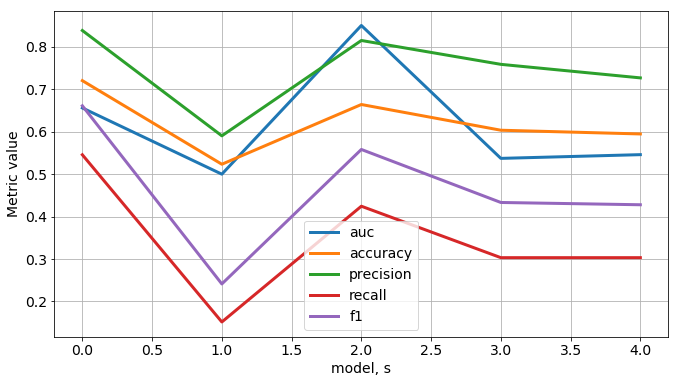

In [51]:
plt.figure(figsize=(11, 6))
plt.plot(metrics['model'].values, metrics['auc'].values, label='auc', linewidth=3)
plt.plot(metrics['model'].values, metrics['accuracy'].values, label='accuracy', linewidth=3)
plt.plot(metrics['model'].values, metrics['precision'].values, label='precision', linewidth=3)
plt.plot(metrics['model'].values, metrics['recall'].values, label='recall', linewidth=3)
plt.plot(metrics['model'].values, metrics['f1'].values, label='f1', linewidth=3)
plt.xlabel('model, s', size=14)
plt.ylabel('Metric value', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   27.5s finished


Number of test points after the preprocessing:  147
Log_loss:  0.6762138571788963
auc:  0.850079744816587
accuracy:  0.6638755980861243
precision:  0.8147013782542113
recall:  0.42424242424242425
f1:  0.5579444153120084


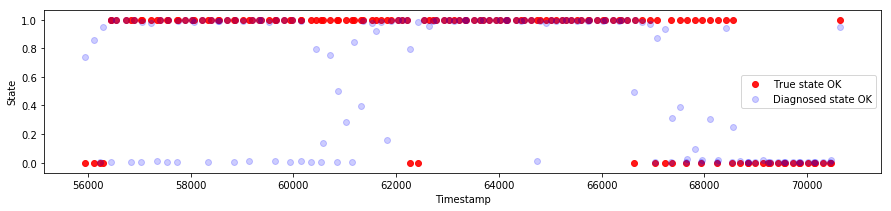

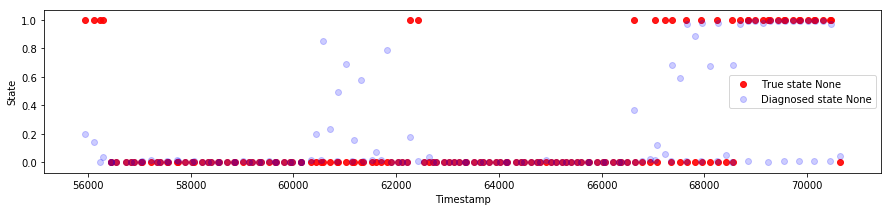

None        OK   Unknown     timestamp        type    name  \
0  0.198250  0.739996  0.061753  55944.757984  controller  sp-0-3   
1  0.141069  0.857016  0.001916  56110.311589  controller  sp-0-3   
2  0.002810  0.004061  0.993129  56240.258738  controller  sp-0-3   
3  0.040217  0.952762  0.007022  56284.073663  controller  sp-0-3   
4  0.005956  0.001076  0.992968  56440.258738  controller  sp-0-3   

  health_state  traffic  load  
0         None      0.0  0.51  
1         None      0.0  0.84  
2         None      0.0  8.44  
3         None      0.0  8.44  
4           OK      0.0  0.77

In [52]:
from sklearn.ensemble import RandomForestClassifier

config3 = {'XGBoost': {'estimator': XGBClassifier(objective='binary:logistic', n_estimators=1000),
                        'params': {'max_depth': [3, 4, 6, 8],
                                   'min_child_weight': [1, 10],
                                   'learning_rate': [0.1, 0.05, 0.01],
                                   'colsample_bytree': [0.7, 1]}}}
clf3 = classifiers.JarvisClassifier(verbose=1)
clf3.set_config(config3)

predictions, log_loss, auc, accuracy, precision, recall, f1 = analysis_pipeline(component_name='sp-0-3', 
                                                                                signal_state='None', 
                                                                                window_size=100, 
                                                                                slice_size=10, 
                                                                                prediction_horizont=0, 
                                                                                method=clf3)

print("Log_loss: ", log_loss)
print("auc: ", auc)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

for state in ['OK', 'None']:
    plt.figure(figsize=(15, 3))
    plt.scatter(predictions['timestamp'].values, predictions['health_state'].values == state, label='True state '+str(state), color='r', alpha=0.9)
    plt.scatter(predictions['timestamp'].values, predictions[str(state)].values, label='Diagnosed state '+str(state), color='b', alpha=0.2)
    plt.legend(loc='best')
    plt.xlabel('Timestamp')
    plt.ylabel('State')
    plt.show()
    
predictions.head(5)